# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она работает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров другого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [66]:
data = pd.read_csv('./train.csv')

In [27]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent', 
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [67]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [69]:

# Приведение числовых признаков к типу данных float
data['ClientPeriod'] = data['ClientPeriod'].astype(float)
data['MonthlySpending'] = data['MonthlySpending'].astype(float)
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')  # Обработка некорректных значений


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   float64
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [9]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

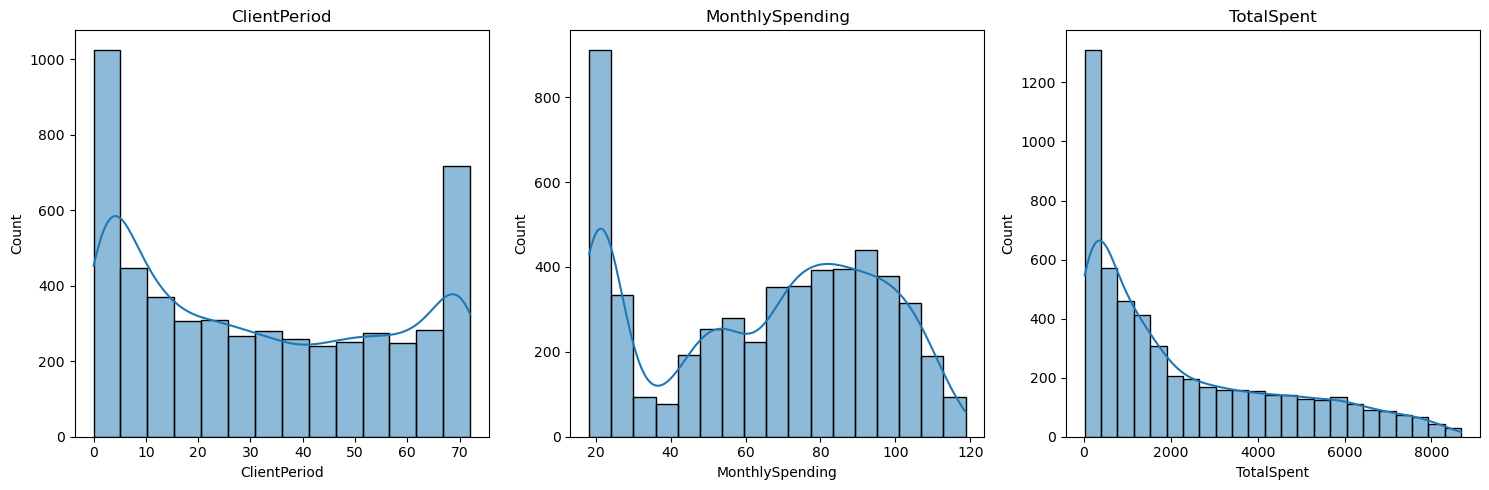

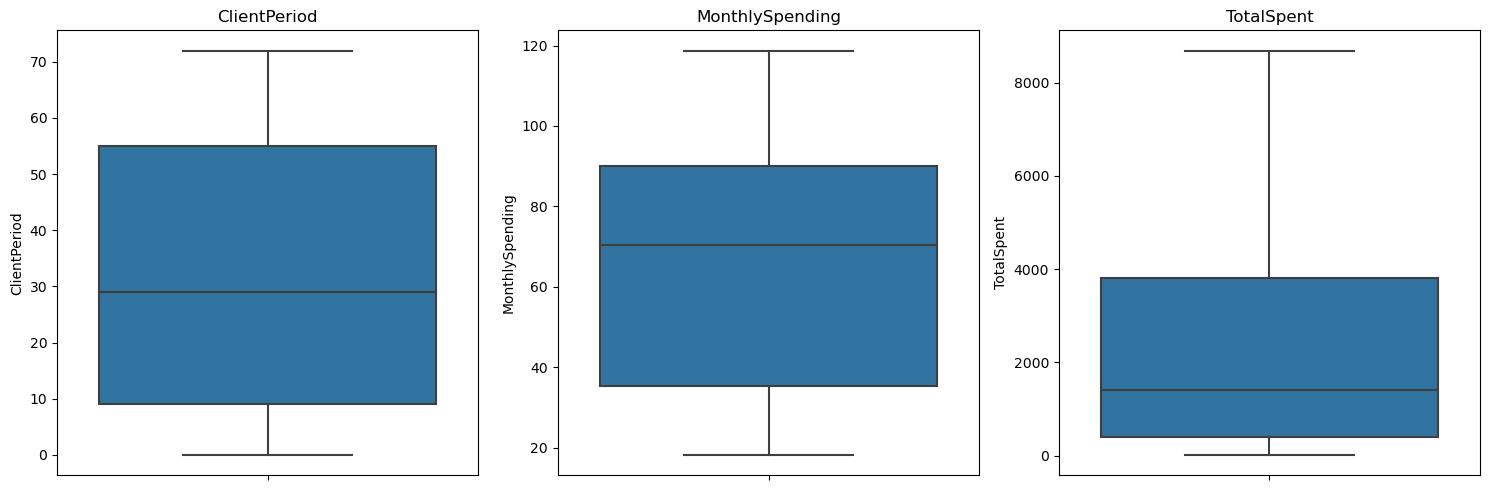

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограммы числовых признаков
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15, 5))

for i, col in enumerate(num_cols):
    sns.histplot(data[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

# Boxplot числовых признаков
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


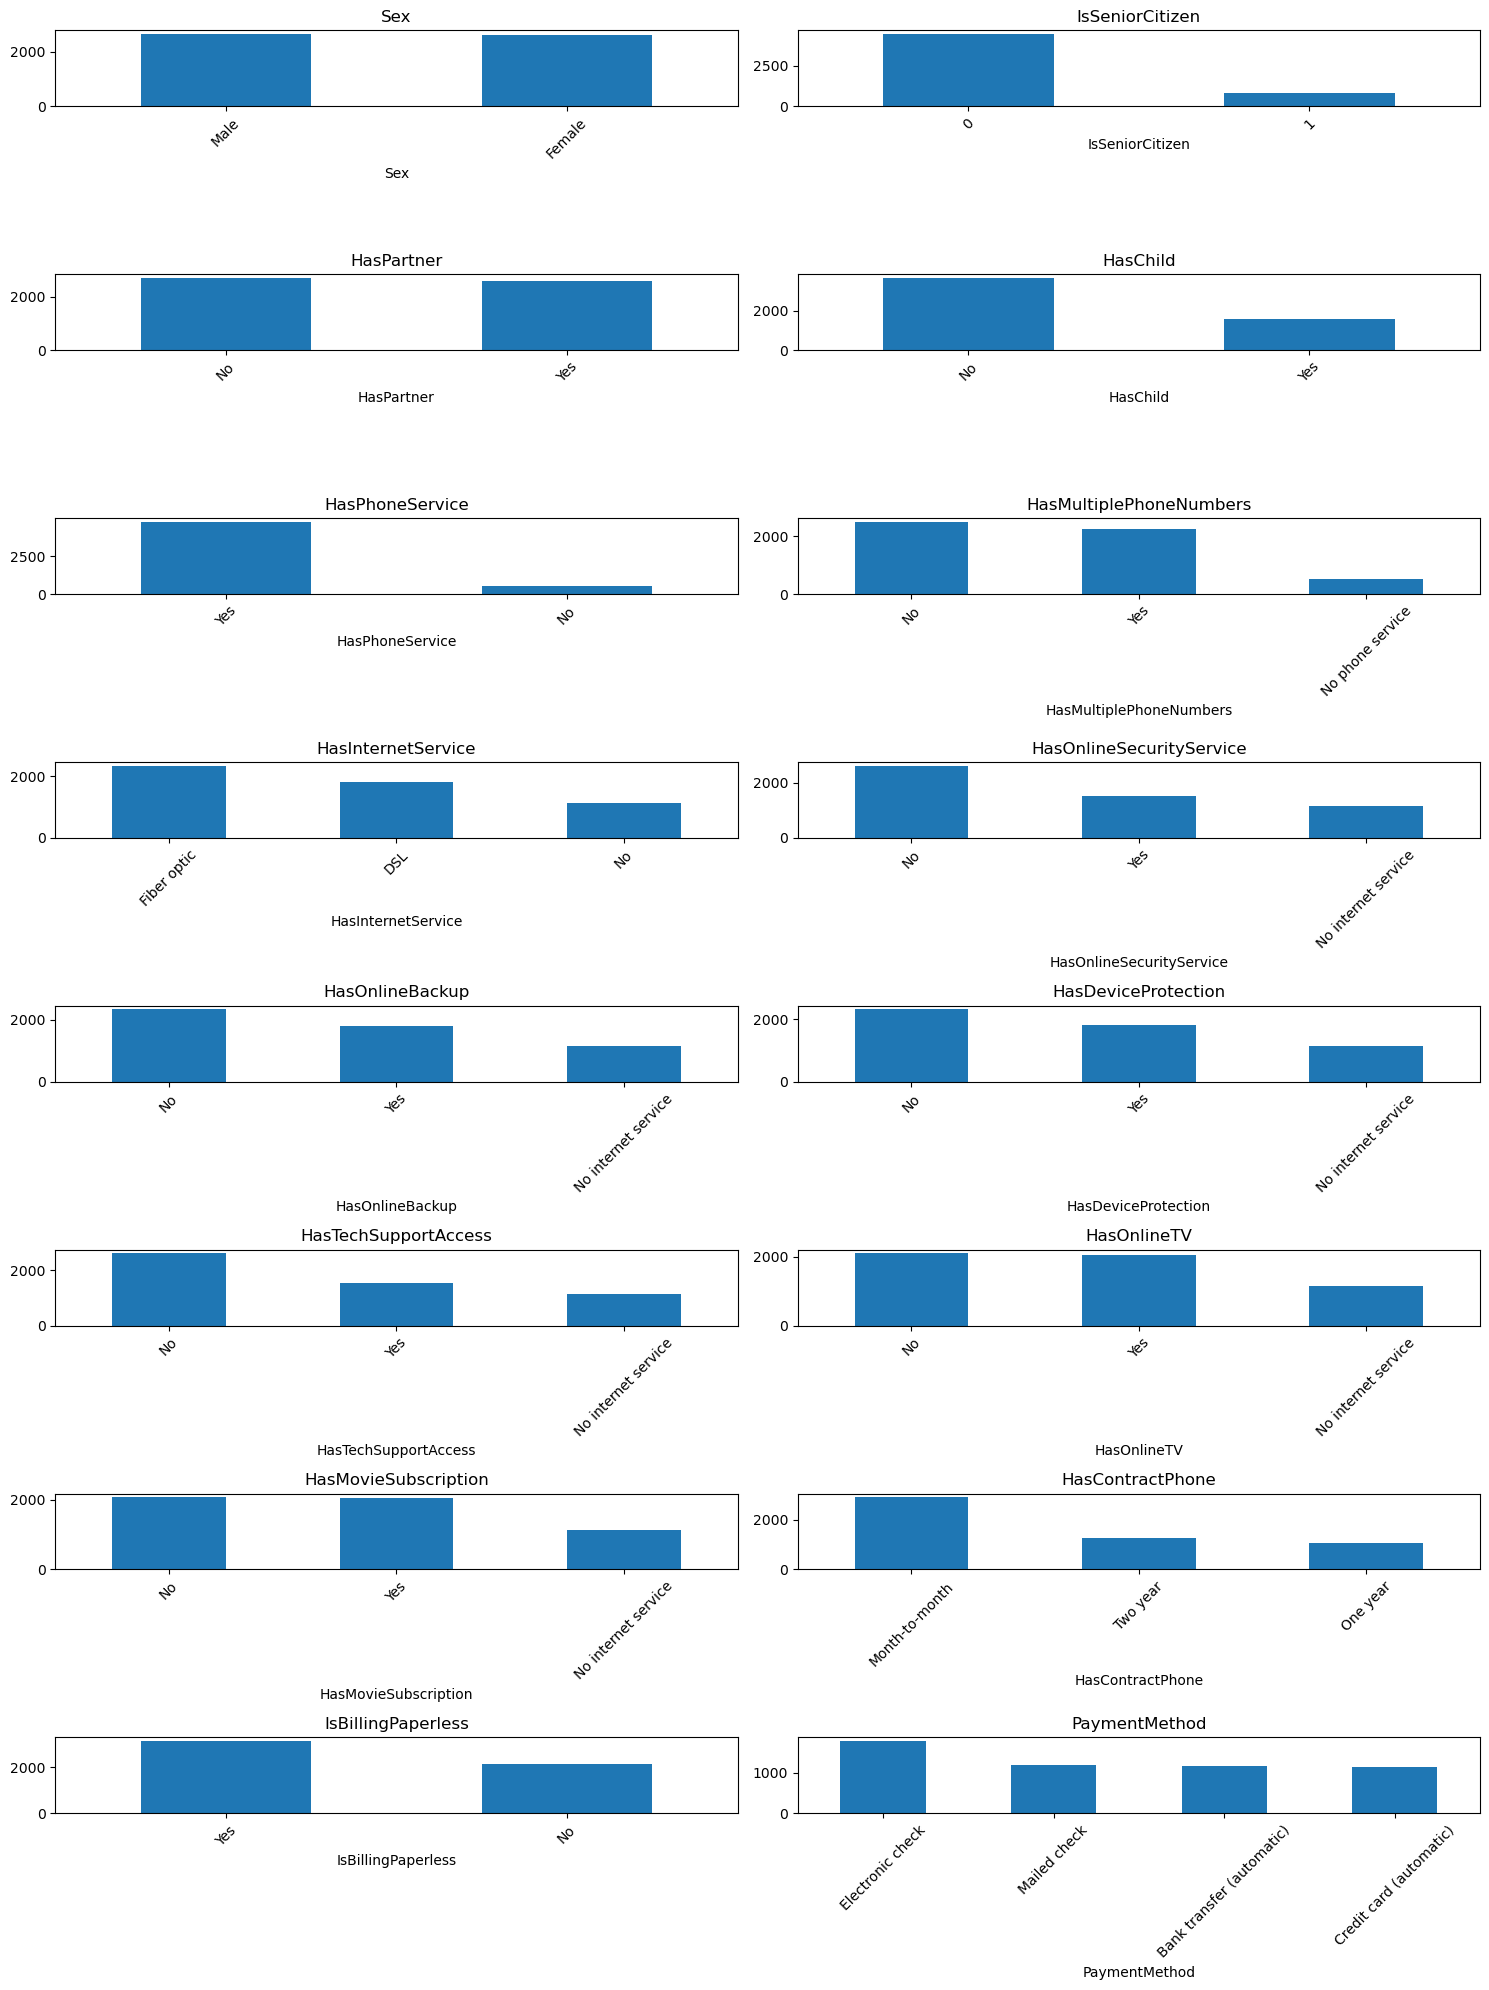

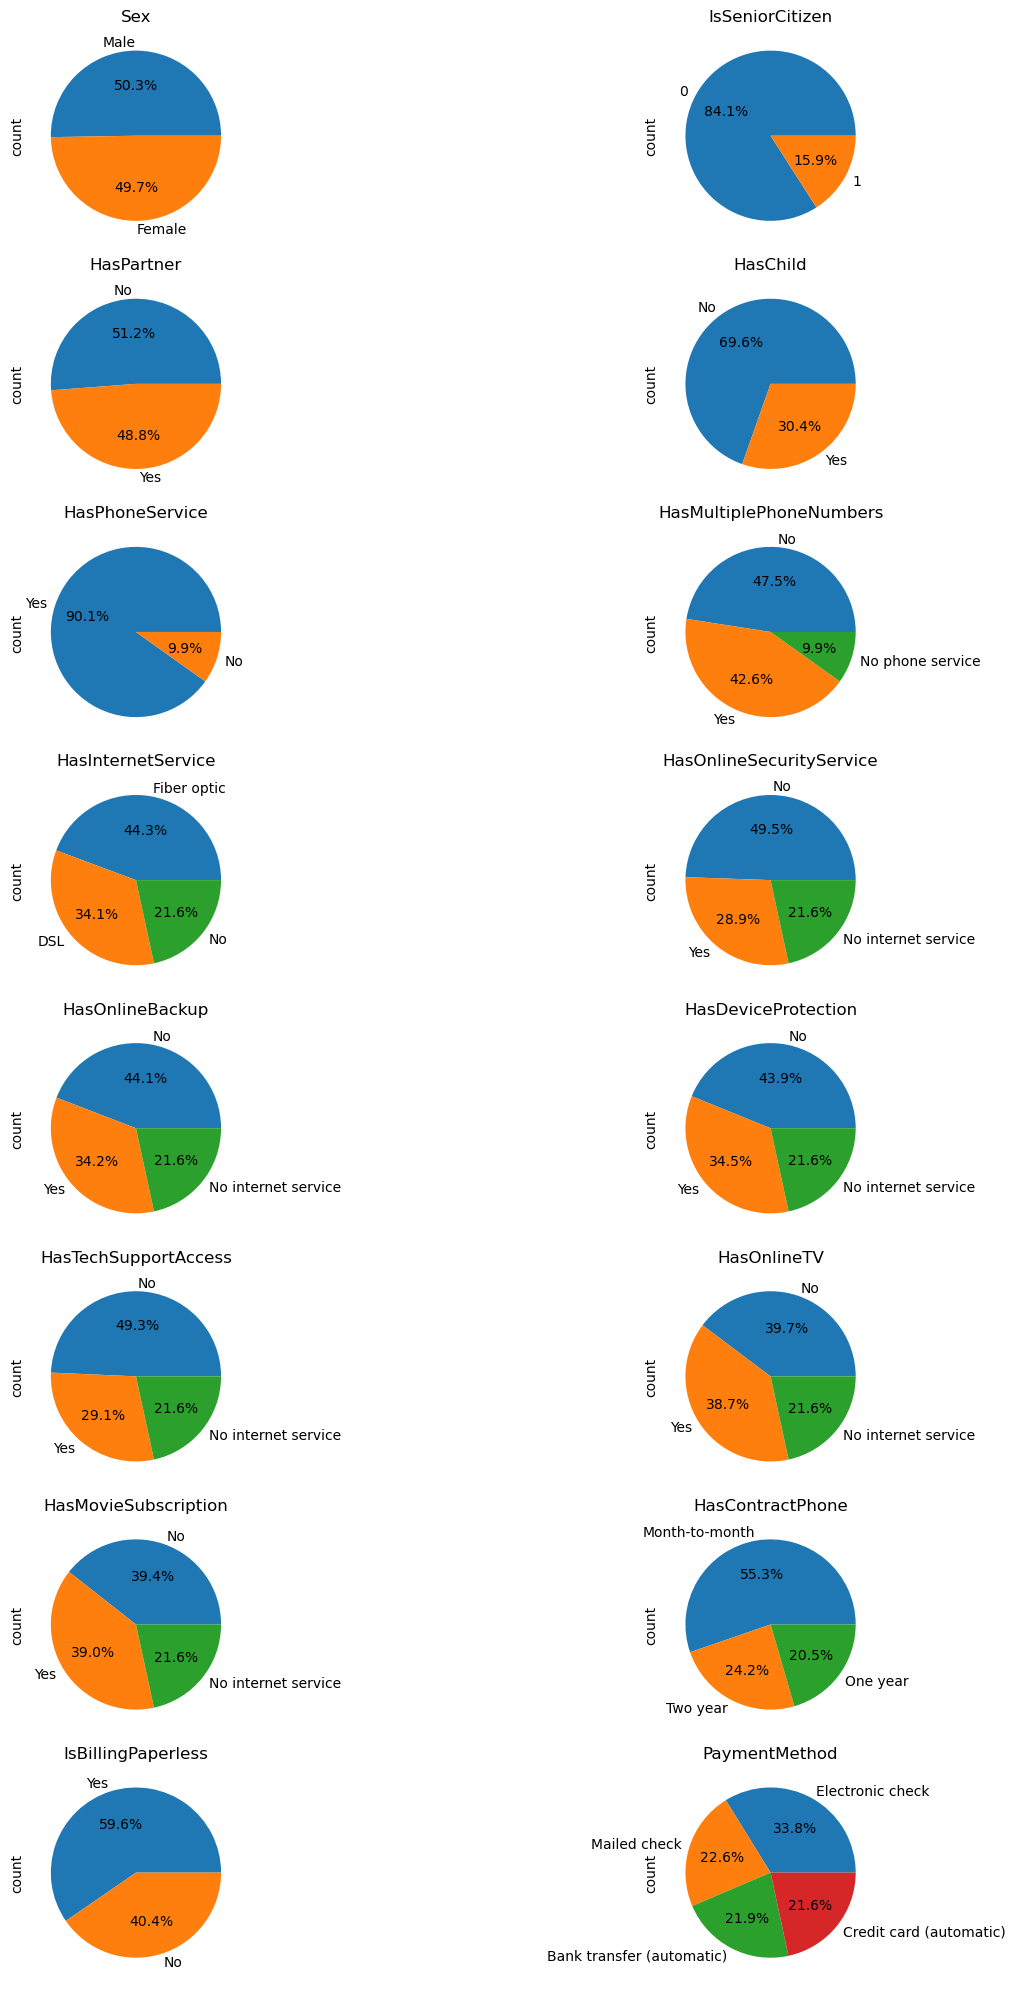

In [11]:
# Столбчатые диаграммы для категориальных признаков
fig, axes = plt.subplots(nrows=len(cat_cols)//2, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    data[col].value_counts().plot(kind='bar', ax=axes[i], rot=45)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

# Круговые диаграммы для категориальных признаков
fig, axes = plt.subplots(nrows=len(cat_cols)//2, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


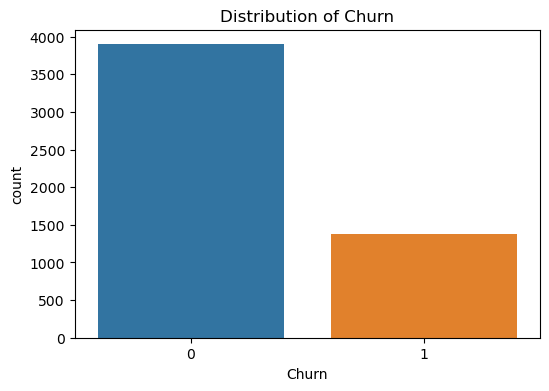

Churn
0    3898
1    1384
Name: count, dtype: int64
Balance Ratio: 0.3550538737814264


In [18]:
# Гистограмма целевой переменной
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=data)
plt.title('Distribution of Churn')
plt.show()

# Подсчет уникальных значений
churn_counts = data[target_col].value_counts()
print(churn_counts)

# Оценка баланса классов
balance_ratio = churn_counts[1] / churn_counts[0]
print("Balance Ratio:", balance_ratio)


In [31]:
from pandas_visual_analysis import VisualAnalysis, DataSource

d = DataSource(data[num_cols])
VisualAnalysis(d)

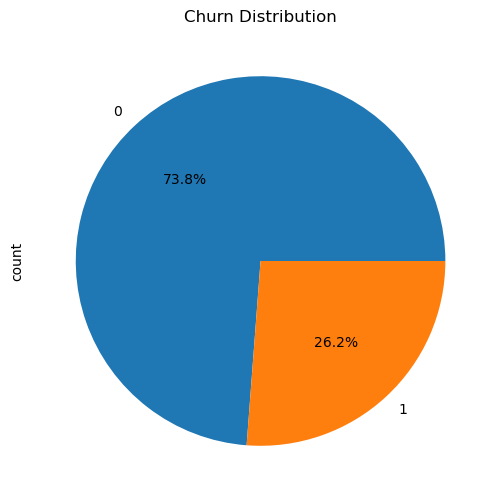

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Круговая диаграмма
plt.figure(figsize=(6, 6))
data['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [50]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

In [37]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Создание трансформаторов для числовых и категориальных признаков
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Заполнение пропущенных значений средним
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Заполнение пропущенных значений наиболее часто встречающимся
    ('onehot', OneHotEncoder(drop='first'))
])

# Создание ColumnTransformer для применения трансформаций
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# Применение преобразований к данным
transformed_data = preprocessor.fit_transform(data)

# Получение имен признаков после one-hot encoding
feature_names = num_cols + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_cols))

# Преобразование результата в DataFrame (для наглядности)
transformed_df = pd.DataFrame(transformed_data, columns=feature_names)

# Вывод первых строк преобразованного DataFrame
transformed_df.head()


,ClientPeriod,MonthlySpending,TotalSpent,Sex_Male,IsSeniorCitizen_1,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.558057,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.613288,-1.294998,-0.184921,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-1.279005,0.363737,-0.977337,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.016173,0.476418,0.122905,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.124450,1.667856,1.970589,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [58]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  5282 non-null   float64
 1   MonthlySpending                               5282 non-null   float64
 2   TotalSpent                                    5282 non-null   float64
 3   Sex_Male                                      5282 non-null   float64
 4   IsSeniorCitizen_1                             5282 non-null   float64
 5   HasPartner_Yes                                5282 non-null   float64
 6   HasChild_Yes                                  5282 non-null   float64
 7   HasPhoneService_Yes                           5282 non-null   float64
 8   HasMultiplePhoneNumbers_No phone service      5282 non-null   float64
 9   HasMultiplePhoneNumbers_Yes                   5282 non-null   f

In [55]:
# Разделение на признаки (X) и целевую переменную (y)
X = transformed_df
y = data[target_col]

# Разделение на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the shapes of X_train, X_valid, y_train, and y_valid are consistent
print("Shapes of training and validation sets:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_valid:", X_valid.shape)
print("y_valid:", y_valid.shape)

# Инициализация LogisticRegressionCV с указанием значения параметра C
logreg_cv = LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001], 
                                 cv=5, 
                                 scoring='roc_auc', 
                                 refit=True,
                                 class_weight='balanced')

# Обучение модели на обучающих данных
logreg_cv.fit(X_train, y_train)

# Вывод лучшего значения параметра C
print("Best C:", logreg_cv.C_[0])

# Предсказание на валидационных данных
y_pred_valid = logreg_cv.predict_proba(X_valid)[:, 1]

# Вычисление ROC-AUC на валидационных данных
roc_auc = roc_auc_score(y_valid, y_pred_valid)
print("ROC-AUC on validation set:", roc_auc)


Shapes of training and validation sets:
X_train: (4225, 30)
y_train: (4225,)
X_valid: (1057, 30)
y_valid: (1057,)
Best C: 10.0
ROC-AUC on validation set: 0.8261421671392026


In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 4556 to 860
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  4225 non-null   float64
 1   MonthlySpending                               4225 non-null   float64
 2   TotalSpent                                    4225 non-null   float64
 3   Sex_Male                                      4225 non-null   float64
 4   IsSeniorCitizen_1                             4225 non-null   float64
 5   HasPartner_Yes                                4225 non-null   float64
 6   HasChild_Yes                                  4225 non-null   float64
 7   HasPhoneService_Yes                           4225 non-null   float64
 8   HasMultiplePhoneNumbers_No phone service      4225 non-null   float64
 9   HasMultiplePhoneNumbers_Yes                   4225 non-null   floa

In [72]:
y = data[target_col]
X = data[num_cols + cat_cols]


In [80]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create categorical transformer with LabelEncoder + OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ('onehot', OneHotEncoder(drop='first'))
])

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# Create a pipeline with data preprocessing and Logistic Regression
model = make_pipeline(preprocessor, LogisticRegression())

# Specify hyperparameters for grid search
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

/Users/bromotdi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/bromotdi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/bromotdi/an

Best Parameters: {'logisticregression__C': 1}
Best Score: 0.8053748817407758


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [87]:
# Импорт необходимых библиотек
import catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Разделение выборки на train и validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Обучение CatBoost с параметрами по умолчанию
model = CatBoostClassifier(cat_features=cat_cols, verbose=100)
model.fit(X_train, y_train, eval_set=(X_valid, y_valid))

# 3. Оценка качества модели на валидационной выборке
predictions = model.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, predictions)
print(f'ROC-AUC на валидационной выборке: {roc_auc}')

# 4. Подбор оптимальных параметров
# Пример подбора параметров: количество деревьев и learning_rate
best_params = {'n_estimators': 0, 'learning_rate': 0}
best_roc_auc = 0

for n_estimators in [100, 200, 300]:
    for learning_rate in [0.01, 0.05, 0.1]:
        model = CatBoostClassifier(cat_features=cat_cols, n_estimators=n_estimators, learning_rate=learning_rate, verbose=100)
        model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=50)

        predictions = model.predict_proba(X_valid)[:, 1]
        roc_auc = roc_auc_score(y_valid, predictions)

        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
            best_params['n_estimators'] = n_estimators
            best_params['learning_rate'] = learning_rate
            best_model = model  # Сохраняем текущую модель как лучшую

# Сохранение лучшей модели
best_model.save_model('best_catboost_model.cbm')

print(f'Лучшие параметры: {best_params}')
print(f'Лучший ROC-AUC на валидационной выборке: {best_roc_auc}')


Learning rate set to 0.045236
0:	learn: 0.6623243	test: 0.6638100	best: 0.6638100 (0)	total: 5.81ms	remaining: 5.8s
100:	learn: 0.3817691	test: 0.4304405	best: 0.4303004 (96)	total: 353ms	remaining: 3.14s
200:	learn: 0.3614865	test: 0.4307705	best: 0.4303004 (96)	total: 692ms	remaining: 2.75s
300:	learn: 0.3363510	test: 0.4340969	best: 0.4303004 (96)	total: 1.07s	remaining: 2.49s
400:	learn: 0.3196108	test: 0.4358834	best: 0.4303004 (96)	total: 1.46s	remaining: 2.18s
500:	learn: 0.3011477	test: 0.4416607	best: 0.4303004 (96)	total: 1.85s	remaining: 1.84s
600:	learn: 0.2845604	test: 0.4448570	best: 0.4303004 (96)	total: 2.23s	remaining: 1.48s
700:	learn: 0.2702407	test: 0.4487135	best: 0.4303004 (96)	total: 2.63s	remaining: 1.12s
800:	learn: 0.2544314	test: 0.4514833	best: 0.4303004 (96)	total: 3.01s	remaining: 748ms
900:	learn: 0.2413759	test: 0.4546033	best: 0.4303004 (96)	total: 3.42s	remaining: 376ms
999:	learn: 0.2296675	test: 0.4582004	best: 0.4303004 (96)	total: 3.81s	remaining: 

In [106]:
catboost = CatBoostClassifier(
    cat_features=cat_cols,
    logging_level="Silent",
    eval_metric="AUC:hints=skip_train~false",
    grow_policy="Lossguide",
    metric_period=1000,
    random_seed=42,
    loss_function='CrossEntropy',
#     task_type='GPU',
    early_stopping_rounds=10
)

PARAMS = {
    "n_estimators": [300, 500, 700, 1000],  # [5, 10, 20, 30, 40, 50, 70, 100, 150, 200, 250, 300, 500, 1000],
    "learning_rate": [0.05],  # [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5],
    "max_depth": [4],  # np.arange(4, 20, 1),
    "l2_leaf_reg": [10],  # np.arange(0.1, 1, 0.05),
    "subsample": [0.6],  # [3, 5, 7, 10],
#     "random_strength": [2, 5, 8],  # [1, 2, 5, 10, 20, 50, 100],
    "min_data_in_leaf": [100],  # np.arange(10, 1001, 10),
#     'task_type': ['GPU'],
#     'early_stopping_rounds': [10],
}
catboost.grid_search(PARAMS, X_train, y_train, cv=5, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.8426465	best: 0.8426465 (0)	total: 452ms	remaining: 1.35s


1:	loss: 0.8426465	best: 0.8426465 (0)	total: 876ms	remaining: 876ms


2:	loss: 0.8426465	best: 0.8426465 (0)	total: 1.34s	remaining: 445ms


3:	loss: 0.8426465	best: 0.8426465 (0)	total: 1.85s	remaining: 0us
Estimating final quality...


{'params': {'min_data_in_leaf': 100,
  'depth': 4,
  'l2_leaf_reg': 10,
  'iterations': 300,
  'subsample': 0.6,
  'learning_rate': 0.05},
 'cv_results': defaultdict(list,
             {'iterations': [0, 154],
              'test-AUC-mean': [0.7855407244475927, 0.8018436345005029],
              'test-AUC-std': [0.019063230381632715, 0.026787436614395425],
              'train-AUC-mean': [0.78715203783109, nan],
              'train-AUC-std': [0.01151268881725035, nan],
              'test-CrossEntropy-mean': [0.6660061779414341, nan],
              'test-CrossEntropy-std': [0.0003682834439739956, nan],
              'train-CrossEntropy-mean': [0.6657066709530791, nan],
              'train-CrossEntropy-std': [0.0013499365853810463, nan]})}

In [108]:
print("Best score:", end=' ')
print(catboost.best_score_)
best_params = catboost.get_params()
for f in ("cat_features", "logging_level", "eval_metric"):
    best_params.pop(f)
print("Best params:", end=' ')
print(best_params)

Best score: {'learn': {'CrossEntropy': 0.37535193128604327, 'AUC': 0.8775228184950548}}
Best params: {'loss_function': 'CrossEntropy', 'random_seed': 42, 'metric_period': 1000, 'early_stopping_rounds': 10, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 100, 'depth': 4, 'l2_leaf_reg': 10, 'iterations': 300, 'subsample': 0.6, 'learning_rate': 0.05}


# Предсказания

In [94]:
loaded_model = CatBoostClassifier()
loaded_model.load_model('best_catboost_model.cbm')
best_model = loaded_model

In [103]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]

submission.to_csv('./my_submission.csv', index=False)

In [104]:
submission

,Id,Churn
0,0,0.036758
1,1,0.663019
2,2,0.673626
3,3,0.023932
4,4,0.006955
...,...,...
1756,1756,0.160433
1757,1757,0.012294
1758,1758,0.786808
1759,1759,0.571176
